In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from tqdm import tqdm
import warnings
warnings.simplefilter(action='ignore')

In [3]:
# Train Data
train = pd.read_csv('data/train.csv')
train

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 1560,Feature 1561,Feature 1562,Feature 1563,Feature 1564,Feature 1565,Feature 1566,Feature 1567,Feature 1568,Unnamed: 1568
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.854928e-19,-1.329011e-20,4.204335e-21,4.428740e-21,4.461340e-23,2.376798e-24,-7.807106e-24,2.379322e-24,-5.582096e-26,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.118652e-20,4.062297e-21,-7.743107e-21,8.638654e-22,-1.006311e-21,-2.267525e-22,-5.867730e-23,4.858047e-24,-4.595498e-25,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.619224e-20,-3.590984e-20,-2.717642e-20,1.923565e-20,-2.244442e-21,-4.244237e-24,-3.599564e-23,7.471194e-24,-3.815300e-24,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.346105e-19,-6.278001e-19,-5.786255e-19,2.573141e-19,2.385063e-19,6.655487e-20,2.834975e-20,3.356577e-21,1.698628e-21,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.494150e-20,-1.187973e-20,-1.450941e-21,8.954877e-22,-2.645088e-22,1.365356e-23,8.062470e-24,-1.235689e-24,1.890073e-25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.956413e-22,7.012638e-21,-1.749799e-21,-5.296019e-22,5.324962e-23,-7.651382e-24,-1.189074e-23,-3.929069e-24,1.550829e-24,NaN
49996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.386547e-22,3.369363e-23,1.459011e-23,5.123315e-25,-5.553792e-25,-1.656932e-25,-4.579053e-26,5.280697e-26,1.550841e-26,NaN
49997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.566546e-20,6.858092e-21,1.256228e-21,-3.157088e-22,1.984213e-23,1.134711e-23,-3.192012e-24,1.801697e-25,-1.020857e-26,NaN
49998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.839305e-21,3.174579e-20,7.510705e-21,-1.584091e-21,9.770302e-23,1.247588e-22,5.449431e-24,2.336028e-24,2.577251e-24,NaN


In [4]:
train.shape

(50000, 1569)

In [5]:
# Test Data
test = pd.read_csv('data/test.csv')
test

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 1560,Feature 1561,Feature 1562,Feature 1563,Feature 1564,Feature 1565,Feature 1566,Feature 1567,Feature 1568,Unnamed: 1568
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.232597e-23,-1.371348e-23,-4.941302e-24,4.701897e-24,9.137646e-24,-5.964309e-25,-8.037856e-27,1.607571e-26,1.896144e-27,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.072854e-20,1.208471e-20,8.119634e-22,-4.124326e-21,-2.351743e-22,-1.139683e-23,-1.730485e-24,-1.088523e-24,-1.192788e-25,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.010960e-17,1.299321e-20,1.007092e-20,-1.007821e-20,2.289849e-21,-8.811264e-22,2.288049e-22,-6.056319e-23,-1.302198e-23,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.262406e-22,-1.204514e-23,-9.310054e-24,-1.898251e-24,-1.192600e-25,-2.870280e-26,-2.612264e-27,-7.700169e-27,-3.745563e-27,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.613074e-21,-3.539335e-21,-6.962758e-20,1.694034e-19,-3.988890e-20,-5.779639e-22,5.424119e-21,1.102504e-22,-2.005880e-22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.125517e-22,-5.571208e-23,1.215935e-22,1.939962e-22,-1.638395e-22,-3.236651e-24,4.809522e-25,-1.347239e-25,5.794320e-26,NaN
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.099703e-21,-8.780294e-22,-6.306931e-22,-1.059037e-21,6.598977e-23,5.641922e-23,1.521738e-23,5.845244e-25,2.289112e-25,NaN
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.969505e-20,-1.698103e-22,2.043203e-22,5.397814e-23,-3.642104e-23,-5.222338e-23,-8.629898e-24,1.129773e-24,-2.509890e-26,NaN
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.036675e-21,2.582385e-22,1.224506e-22,3.189655e-23,-7.812957e-24,-2.556415e-24,2.959303e-25,1.060729e-25,1.069585e-25,NaN


In [6]:
# Train data labels
train_result=pd.read_csv('data/train_result.csv')
train_result

,Index,Class
0,0,5
1,1,4
2,2,5
3,3,4
4,4,4
...,...,...
49995,49995,9
49996,49996,14
49997,49997,1
49998,49998,7


In [7]:
# Cleaning Data
X = train
X=X.loc[:, ~X.columns.str.contains('^Unnamed')]
X

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 1559,Feature 1560,Feature 1561,Feature 1562,Feature 1563,Feature 1564,Feature 1565,Feature 1566,Feature 1567,Feature 1568
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.281934e-19,3.854928e-19,-1.329011e-20,4.204335e-21,4.428740e-21,4.461340e-23,2.376798e-24,-7.807106e-24,2.379322e-24,-5.582096e-26
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.714815e-19,-7.118652e-20,4.062297e-21,-7.743107e-21,8.638654e-22,-1.006311e-21,-2.267525e-22,-5.867730e-23,4.858047e-24,-4.595498e-25
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.968480e-20,-4.619224e-20,-3.590984e-20,-2.717642e-20,1.923565e-20,-2.244442e-21,-4.244237e-24,-3.599564e-23,7.471194e-24,-3.815300e-24
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.256463e-20,-5.346105e-19,-6.278001e-19,-5.786255e-19,2.573141e-19,2.385063e-19,6.655487e-20,2.834975e-20,3.356577e-21,1.698628e-21
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.446271e-19,5.494150e-20,-1.187973e-20,-1.450941e-21,8.954877e-22,-2.645088e-22,1.365356e-23,8.062470e-24,-1.235689e-24,1.890073e-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.806037e-19,-9.956413e-22,7.012638e-21,-1.749799e-21,-5.296019e-22,5.324962e-23,-7.651382e-24,-1.189074e-23,-3.929069e-24,1.550829e-24
49996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.120559e-21,-2.386547e-22,3.369363e-23,1.459011e-23,5.123315e-25,-5.553792e-25,-1.656932e-25,-4.579053e-26,5.280697e-26,1.550841e-26
49997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.683112e-18,-1.566546e-20,6.858092e-21,1.256228e-21,-3.157088e-22,1.984213e-23,1.134711e-23,-3.192012e-24,1.801697e-25,-1.020857e-26
49998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.349202e-20,-1.839305e-21,3.174579e-20,7.510705e-21,-1.584091e-21,9.770302e-23,1.247588e-22,5.449431e-24,2.336028e-24,2.577251e-24


In [8]:
y=train_result['Class']
y

0         5
1         4
2         5
3         4
4         4
         ..
49995     9
49996    14
49997     1
49998     7
49999     9
Name: Class, Length: 50000, dtype: int64

In [9]:
# Cleaning Data
X_test=test
X_test=X_test.loc[:, ~X_test.columns.str.contains('^Unnamed')]
X_test

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 1559,Feature 1560,Feature 1561,Feature 1562,Feature 1563,Feature 1564,Feature 1565,Feature 1566,Feature 1567,Feature 1568
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.955389e-23,-4.232597e-23,-1.371348e-23,-4.941302e-24,4.701897e-24,9.137646e-24,-5.964309e-25,-8.037856e-27,1.607571e-26,1.896144e-27
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.713258e-20,-3.072854e-20,1.208471e-20,8.119634e-22,-4.124326e-21,-2.351743e-22,-1.139683e-23,-1.730485e-24,-1.088523e-24,-1.192788e-25
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.737605e-19,1.010960e-17,1.299321e-20,1.007092e-20,-1.007821e-20,2.289849e-21,-8.811264e-22,2.288049e-22,-6.056319e-23,-1.302198e-23
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.688333e-22,1.262406e-22,-1.204514e-23,-9.310054e-24,-1.898251e-24,-1.192600e-25,-2.870280e-26,-2.612264e-27,-7.700169e-27,-3.745563e-27
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.748979e-21,-1.613074e-21,-3.539335e-21,-6.962758e-20,1.694034e-19,-3.988890e-20,-5.779639e-22,5.424119e-21,1.102504e-22,-2.005880e-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.176424e-21,2.125517e-22,-5.571208e-23,1.215935e-22,1.939962e-22,-1.638395e-22,-3.236651e-24,4.809522e-25,-1.347239e-25,5.794320e-26
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.372621e-20,6.099703e-21,-8.780294e-22,-6.306931e-22,-1.059037e-21,6.598977e-23,5.641922e-23,1.521738e-23,5.845244e-25,2.289112e-25
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.796364e-20,-1.969505e-20,-1.698103e-22,2.043203e-22,5.397814e-23,-3.642104e-23,-5.222338e-23,-8.629898e-24,1.129773e-24,-2.509890e-26
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.536667e-20,-5.036675e-21,2.582385e-22,1.224506e-22,3.189655e-23,-7.812957e-24,-2.556415e-24,2.959303e-25,1.060729e-25,1.069585e-25


In [10]:
print(X.shape)
print(X_test.shape)
print(y.shape)

(50000, 1568)
(10000, 1568)
(50000,)


Real Number is: 9


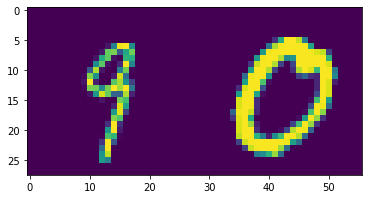

In [61]:
# checking the pixel result of train data
def PltPixelImg():
    idx = np.random.randint(50000)
    x_n= X.to_numpy()
    exp = x_n[idx].reshape(28,56)
    print("Real Number is:", y[idx])
    plt.imshow(exp)
PltPixelImg()

In [11]:
# Normalize the data 
def normalize(data):
    min = np.min(data)
    max = np.max(data)
    data_normalized =data/(max-min)
    return data_normalized

In [12]:
# Softmax Activation Function
def softmax(z):
    return np.exp(z)/np.sum(np.exp(z))

In [90]:
# Entropy calculation function
def CrossEnt_val(X, Y, b):
    """
    X: data
    Y: labels
    b: Estimate
    """
    N = X.shape[0]
    M = 0.0
    for i in range(N):
        Xi = X[i]
        Yi = Y[i]
        xyii = softmax(np.dot(b,Xi))
        """ 
        Xyii: probability vector X
        Yi: probability vector Y
        """        
        M += -np.vdot(Yi, np.log(xyii)) 
    return M

In [107]:
#logistic regression function
def LogisticRegression(X, Y, a):
    """
    X: features
    Y: labels
    a: learning rate
    returns : beta - learned paramter , loss - loss function
    """
    Epochs = 75
    N, d = X.shape
    K = Y.shape[1]
    beta = np.zeros((K, d+1)) # Parameter 
    Loss = []
    X = np.insert(X, 0, 1, axis=1)
    for epoch in tqdm(range(Epochs)):
        L = CrossEnt_val(X, Y, beta) # Entropy Loss
        Loss.append(L)
        print("Epoch " + str(epoch+1) + " Cost : " + str(L))
        
        rm_sample = np.random.permutation(N) 
        for i in rm_sample: 
            gradloss = np.outer(softmax(np.dot(beta , X[i])) - Y[i], X[i]) #adusjtment for parameter
            # updating the parameter
            beta = beta - a * gradloss
    print("Training completed!")
    return beta, Loss

In [104]:
# Prediction Function
def PredictNumber(X, beta):
    """
    X: Test dataset
    Beta : Parameter
    returns : Predictions
    """
    X = np.insert(X, 0, 1, axis=1)
    N = X.shape[0]

    predictions = []

    for i in range(N):
        Prob = softmax(np.dot(beta,X[i])) #returns the probabilities of each label
        k = np.argmax(Prob) # Taking Maximum argument as label
        predictions.append(k)
    return predictions

In [42]:
# Split training dataset into Train and Validation Dataset
def split_dataset(data,test, size = 0.25):
    #Dataframe to array
    """
    data: Training Dataset
    test: Trainig labels
    size: Split ratio
    """
    Arrdata = data.to_numpy() 
    Rows = Arrdata.shape[0] 
    tRows = np.round(Rows * size) 
    randNum = np.random.randint(0, int(Rows), int(tRows)) 
    tData = np.array([Arrdata[i] for i in randNum]) 
    Arrdata = np.delete(Arrdata, randNum, axis = 0) 
    train_attributes = Arrdata
    test_attributes = tData
    Arrdata = test.to_numpy()
    test_result=np.array([Arrdata[i] for i in randNum])
    train_result=np.delete(Arrdata, randNum, axis = 0) 
    
    
    return train_attributes, train_result, test_attributes, test_result   

# running split_dataset
train_attributes, train_result, test_attributes, test_result = split_dataset(X,y, size = 0.25)

In [43]:
#Attributes being Normalized 
normalized_X=normalize(train_attributes) 
normalized_Test=normalize(test_attributes)
normalized_X.shape, train_result.shape, normalized_Test.shape, test_result.shape

((38932, 1568), (38932,), (12500, 1568), (12500,))

In [83]:
reshape_train_label = train_result.reshape(train_result.shape[0],)
one_hot_encoded_train_label = pd.get_dummies(reshape_train_label).values
print(one_hot_encoded_train_label.shape)
one_hot_encoded_train_label

(38932, 19)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [108]:
beta, Lvals = LogisticRegression(normalized_X, one_hot_encoded_train_label, a=0.01)

  0%|          | 0/75 [00:00<?, ?it/s]

Epoch 1 Cost : 114632.89833683378


  1%|▏         | 1/75 [00:07<09:48,  7.95s/it]

Epoch 2 Cost : 94338.752935643


  3%|▎         | 2/75 [00:14<08:21,  6.87s/it]

Epoch 3 Cost : 93010.02109771548


  4%|▍         | 3/75 [00:20<08:09,  6.80s/it]

Epoch 4 Cost : 91413.66406469657


  5%|▌         | 4/75 [00:27<08:00,  6.76s/it]

Epoch 5 Cost : 92231.80657494921


  7%|▋         | 5/75 [00:34<07:50,  6.71s/it]

Epoch 6 Cost : 88481.71842762365


  8%|▊         | 6/75 [00:40<07:42,  6.70s/it]

Epoch 7 Cost : 96670.9608121034


  9%|▉         | 7/75 [00:47<07:33,  6.68s/it]

Epoch 8 Cost : 88139.63729811917


 11%|█         | 8/75 [00:54<07:26,  6.67s/it]

Epoch 9 Cost : 87581.29108403239


 12%|█▏        | 9/75 [01:00<07:18,  6.65s/it]

Epoch 10 Cost : 93123.8489086884


 13%|█▎        | 10/75 [01:07<07:12,  6.65s/it]

Epoch 11 Cost : 89520.70871454455


 15%|█▍        | 11/75 [01:13<07:05,  6.64s/it]

Epoch 12 Cost : 90821.15913515886


 16%|█▌        | 12/75 [01:20<06:58,  6.64s/it]

Epoch 13 Cost : 96322.16526909753


 17%|█▋        | 13/75 [01:27<06:51,  6.64s/it]

Epoch 14 Cost : 88838.40768917535


 19%|█▊        | 14/75 [01:33<06:46,  6.66s/it]

Epoch 15 Cost : 87491.3594824647


 20%|██        | 15/75 [01:40<06:38,  6.64s/it]

Epoch 16 Cost : 87768.21925430688


 21%|██▏       | 16/75 [01:47<06:32,  6.65s/it]

Epoch 17 Cost : 87093.7313844088


 23%|██▎       | 17/75 [01:53<06:24,  6.63s/it]

Epoch 18 Cost : 88450.35489851513


 24%|██▍       | 18/75 [02:00<06:18,  6.64s/it]

Epoch 19 Cost : 98307.68514179207


 25%|██▌       | 19/75 [02:07<06:16,  6.73s/it]

Epoch 20 Cost : 96694.36769770614


 27%|██▋       | 20/75 [02:14<06:12,  6.77s/it]

Epoch 21 Cost : 85598.60122066914


 28%|██▊       | 21/75 [02:20<06:02,  6.72s/it]

Epoch 22 Cost : 91089.65907941136


 29%|██▉       | 22/75 [02:27<05:54,  6.70s/it]

Epoch 23 Cost : 86566.73490993535


 31%|███       | 23/75 [02:34<05:46,  6.67s/it]

Epoch 24 Cost : 84907.03866820385


 32%|███▏      | 24/75 [02:40<05:39,  6.65s/it]

Epoch 25 Cost : 89202.57777311771


 33%|███▎      | 25/75 [02:47<05:31,  6.64s/it]

Epoch 26 Cost : 87612.46815034127


 35%|███▍      | 26/75 [02:53<05:25,  6.64s/it]

Epoch 27 Cost : 87005.3870783034


 36%|███▌      | 27/75 [03:00<05:18,  6.65s/it]

Epoch 28 Cost : 86244.95690625429


 37%|███▋      | 28/75 [03:07<05:12,  6.66s/it]

Epoch 29 Cost : 83881.78767622232


 39%|███▊      | 29/75 [03:13<05:05,  6.64s/it]

Epoch 30 Cost : 84645.16525179299


 40%|████      | 30/75 [03:20<04:58,  6.63s/it]

Epoch 31 Cost : 83465.02696834353


 41%|████▏     | 31/75 [03:27<04:51,  6.62s/it]

Epoch 32 Cost : 88312.69404618797


 43%|████▎     | 32/75 [03:34<04:54,  6.84s/it]

Epoch 33 Cost : 92703.43261767997


 44%|████▍     | 33/75 [03:41<04:47,  6.85s/it]

Epoch 34 Cost : 90104.7766397182


 45%|████▌     | 34/75 [03:48<04:40,  6.85s/it]

Epoch 35 Cost : 92535.30997383887


 47%|████▋     | 35/75 [03:54<04:32,  6.82s/it]

Epoch 36 Cost : 87034.77632024333


 48%|████▊     | 36/75 [04:01<04:24,  6.79s/it]

Epoch 37 Cost : 85502.28920735275


 49%|████▉     | 37/75 [04:08<04:17,  6.77s/it]

Epoch 38 Cost : 86024.47718895918


 51%|█████     | 38/75 [04:15<04:09,  6.75s/it]

Epoch 39 Cost : 86284.45926146602


 52%|█████▏    | 39/75 [04:21<04:01,  6.72s/it]

Epoch 40 Cost : 90675.43470344156


 53%|█████▎    | 40/75 [04:28<03:55,  6.74s/it]

Epoch 41 Cost : 89796.7480242545


 55%|█████▍    | 41/75 [04:35<03:50,  6.79s/it]

Epoch 42 Cost : 86736.65074510175


 56%|█████▌    | 42/75 [04:42<03:51,  7.00s/it]

Epoch 43 Cost : 85661.75579001423


 57%|█████▋    | 43/75 [04:50<03:46,  7.08s/it]

Epoch 44 Cost : 82446.09282179696


 59%|█████▊    | 44/75 [04:57<03:40,  7.10s/it]

Epoch 45 Cost : 87605.29880042466


 60%|██████    | 45/75 [05:04<03:30,  7.02s/it]

Epoch 46 Cost : 85734.3020567686


 61%|██████▏   | 46/75 [05:10<03:21,  6.94s/it]

Epoch 47 Cost : 84728.92908894384


 63%|██████▎   | 47/75 [05:17<03:12,  6.87s/it]

Epoch 48 Cost : 87062.28053219712


 64%|██████▍   | 48/75 [05:24<03:04,  6.85s/it]

Epoch 49 Cost : 84773.96481730675


 65%|██████▌   | 49/75 [05:31<02:57,  6.82s/it]

Epoch 50 Cost : 84228.63251327007


 67%|██████▋   | 50/75 [05:37<02:49,  6.80s/it]

Epoch 51 Cost : 86917.82907504337


 68%|██████▊   | 51/75 [05:44<02:42,  6.76s/it]

Epoch 52 Cost : 85976.21846798602


 69%|██████▉   | 52/75 [05:51<02:35,  6.75s/it]

Epoch 53 Cost : 84174.49467499091


 71%|███████   | 53/75 [05:58<02:28,  6.76s/it]

Epoch 54 Cost : 86397.93091139475


 72%|███████▏  | 54/75 [06:04<02:22,  6.77s/it]

Epoch 55 Cost : 87181.33924715083


 73%|███████▎  | 55/75 [06:11<02:14,  6.74s/it]

Epoch 56 Cost : 84851.8841290104


 75%|███████▍  | 56/75 [06:19<02:13,  7.00s/it]

Epoch 57 Cost : 83680.41059706494


 76%|███████▌  | 57/75 [06:25<02:04,  6.92s/it]

Epoch 58 Cost : 87846.98050102699


 77%|███████▋  | 58/75 [06:32<01:55,  6.79s/it]

Epoch 59 Cost : 92889.4040822144


 79%|███████▊  | 59/75 [06:38<01:46,  6.66s/it]

Epoch 60 Cost : 84237.51033647337


 80%|████████  | 60/75 [06:45<01:38,  6.60s/it]

Epoch 61 Cost : 83200.10681960975


 81%|████████▏ | 61/75 [06:51<01:32,  6.60s/it]

Epoch 62 Cost : 85823.6006673996


 83%|████████▎ | 62/75 [06:58<01:26,  6.63s/it]

Epoch 63 Cost : 83632.0043368711


 84%|████████▍ | 63/75 [07:06<01:23,  6.98s/it]

Epoch 64 Cost : 87487.58398260297


 85%|████████▌ | 64/75 [07:13<01:16,  6.99s/it]

Epoch 65 Cost : 93566.3117168746


 87%|████████▋ | 65/75 [07:20<01:10,  7.01s/it]

Epoch 66 Cost : 84306.32038082303


 88%|████████▊ | 66/75 [07:27<01:02,  6.94s/it]

Epoch 67 Cost : 87340.1516797898


 89%|████████▉ | 67/75 [07:34<00:55,  6.92s/it]

Epoch 68 Cost : 86075.64763553216


 91%|█████████ | 68/75 [07:41<00:49,  7.05s/it]

Epoch 69 Cost : 83856.81841022489


 92%|█████████▏| 69/75 [07:48<00:42,  7.05s/it]

Epoch 70 Cost : 81706.93732389656


 93%|█████████▎| 70/75 [07:55<00:34,  6.99s/it]

Epoch 71 Cost : 84397.39991124015


 95%|█████████▍| 71/75 [08:01<00:27,  6.91s/it]

Epoch 72 Cost : 87610.99205368619


 96%|█████████▌| 72/75 [08:08<00:20,  6.87s/it]

Epoch 73 Cost : 85754.24470903254


 97%|█████████▋| 73/75 [08:15<00:13,  6.83s/it]

Epoch 74 Cost : 89157.48252047635


 99%|█████████▊| 74/75 [08:22<00:06,  6.80s/it]

Epoch 75 Cost : 86789.54991114167


100%|██████████| 75/75 [08:29<00:00,  6.79s/it]


Training completed!


In [95]:
beta.shape

(19, 1569)

Text(0, 0.5, 'Cost')

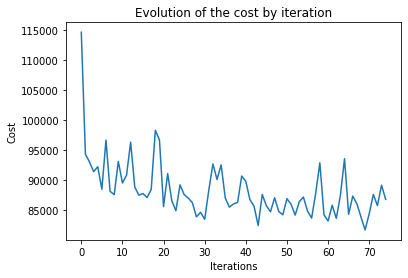

In [109]:
plt.plot(range(len(Lvals)),Lvals)
plt.title('Evolution of the cost by iteration')
plt.xlabel('Iterations')
plt.ylabel('Cost')

#### Testing with validation Data

In [110]:
predictions = PredictNumber(normalized_Test, beta)

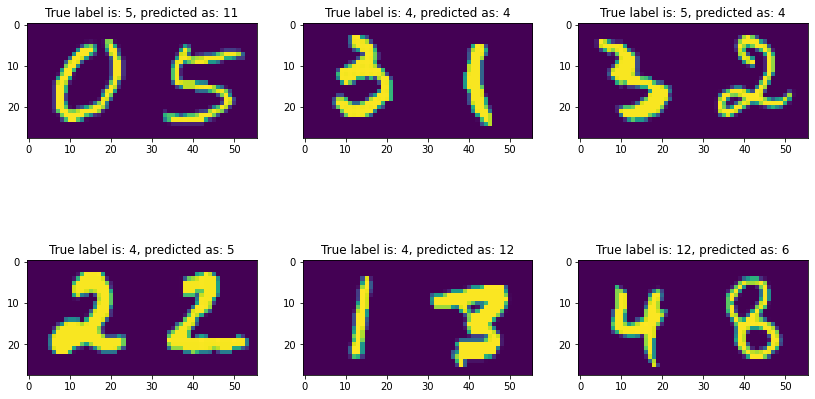

In [79]:
plt.figure(figsize=(14,8))
for i in range(6):
    x_n= X.to_numpy()
    image = x_n[i].reshape(28,56)
    plt.subplot(2,3,i+1)
    plt.imshow(image)
    title = f"True label is: {y[i]}, predicted as: {predictions[i]}"
    plt.title(title)

#### Validation Set Accuracy

In [111]:
numCorrect = 0
test_y = np.array(test_result)
numTest = test_y.shape[0]
for i in range(numTest):
    if predictions[i] == test_y[i]:
        numCorrect += 1

accuracy = numCorrect/numTest
print("accuracy: ", str(accuracy))

accuracy:  0.194


#### Testing on Real test data

In [69]:
test_result_cnn=pd.read_csv('data/test_result_final.csv')
Y_test=test_result_cnn['Class'].values

In [70]:
predictions_final_test = PredictNumber(X_test.values, beta)

#### Checking Accuracy against Test result from CNN

In [112]:
numCorrect = 0
test_y = np.array(Y_test)
numTest = test_y.shape[0]
for i in range(numTest):
    if predictions_final_test[i] == test_y[i]:
        numCorrect += 1

accuracy = numCorrect/numTest
print("accuracy: ", str(accuracy))

accuracy:  0.2209


In [72]:
test_pred = pd.DataFrame(predictions_final_test)
test_pred.index.name = 'Index'
test_pred = test_pred.rename(columns = {0: 'Class'}).reset_index()
test_pred

,Index,Class
0,0,10
1,1,9
2,2,9
3,3,8
4,4,4
...,...,...
9995,9995,9
9996,9996,14
9997,9997,9
9998,9998,5


In [ ]:
test_pred.to_csv('test_result_LR.csv', index = False)